mushrooms.shape (8124, 23)
2708/2708 [==============================] - 0s 25us/step
Model Evaluation: [2.3061274577669803e-07, 1.0]


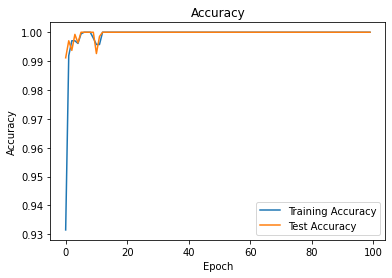

2708/2708 [==============================] - 0s 25us/step
Model Evaluation: [1.7467631597319377e-07, 1.0]


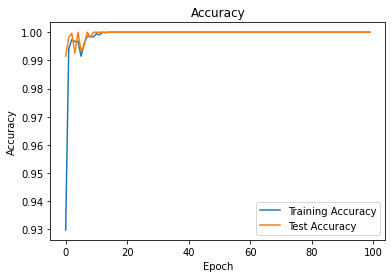

2708/2708 [==============================] - 0s 27us/step
Model Evaluation: [1.9475464175083284e-07, 1.0]


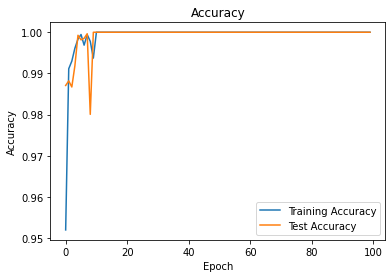

Time requried for training: 0:01:24.315296


In [ ]:

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Import Libraries Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
import datetime
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import KFold


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Load Data Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Read the dataset file and load data into Spyder, and set the first row as header
mushrooms=pd.read_csv("mushrooms_new.csv", header = 0)
# Drop any possible empty value
mushrooms = mushrooms.dropna()
# Get the values for each feature in mushrooms
mushrooms = mushrooms.values
# Print the shape of the dataset
print('mushrooms.shape',mushrooms.shape)

# Let columns 0-22 be the input variable, x; and let column 23 be the output variable, y
x= mushrooms[:,0:22]
y= mushrooms[:,22]
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Pretreat Data Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Reshape both input variable and output variable
x = np.array(x).reshape((len(x), 22)) 
y = np.array(y).reshape((len(y), 1))
# Let outputs be categorical
y = to_categorical(y)


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Define Model Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# start counting the model running time
start_time = datetime.datetime.now()

# create a function called build_model
def build_model():
    model=Sequential()
   # add input layer, hidden layers, and output layer to the model
    model.add(Dense(50,input_dim=22, activation='relu'))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(150, activation = 'relu'))
    model.add(Dense(200, activation = 'relu'))
    model.add(Dense(2, activation='sigmoid'))
    #compile network
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['acc'])

    return model

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Train Model Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# split dataset into 3 parts, for K-fold cross validation use 
n_split=3

# in a for loop, split dataset into train and test sets by the number of split
for train_index, test_index in KFold(n_splits=n_split, shuffle=True, random_state=None).split(x):
    x_train, x_test=x[train_index], x[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=build_model()       
    #model.summary 
    # set the number of batch size and epochs for the cross validation process 
    history=model.fit(x_train, y_train, batch_size=50, epochs=100, verbose=0, validation_data=(x_test, y_test))
    print('Model Evaluation:', model.evaluate(x_test, y_test))
    # plot the graph, including the training set, test set, title, axis labels, and legend
    plt.figure()
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Test Accuracy')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc="lower right")
    plt.show()


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Show output Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# End the time of model running at this point
stop_time = datetime.datetime.now()
print("Time requried for training:",stop_time - start_time)


